In [1]:
from sklearn import datasets
raw_wine = datasets.load_wine()
X, y = raw_wine.data, raw_wine.target

In [2]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y)

In [3]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std, X_te_std = std_scale.transform(X_tn), std_scale.transform(X_te)

In [4]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_tn_std, y_tn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(189.42631578947368, 201.90857142857143, 'X[12] <= -0.0\ngini = 0.66\nsamples = 133\nvalue = [46, 51, 36]'),
 Text(114.53684210526316, 170.84571428571428, 'X[9] <= -0.136\ngini = 0.499\nsamples = 80\nvalue = [2, 48, 30]'),
 Text(70.48421052631579, 139.78285714285715, 'X[6] <= -1.184\ngini = 0.181\nsamples = 51\nvalue = [2, 46, 3]'),
 Text(35.242105263157896, 108.72, 'X[11] <= -0.971\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(17.621052631578948, 77.65714285714284, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(52.863157894736844, 77.65714285714284, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(105.72631578947369, 108.72, 'X[2] <= 1.649\ngini = 0.081\nsamples = 47\nvalue = [2, 45, 0]'),
 Text(88.10526315789474, 77.65714285714284, 'X[1] <= 1.571\ngini = 0.043\nsamples = 46\nvalue = [1, 45, 0]'),
 Text(70.48421052631579, 46.59428571428572, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(105.72631578947369, 46.59428571428572, 'X[4] <= -0.351\ngini = 0.44

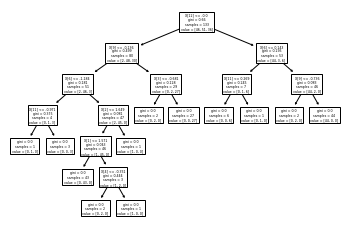

In [5]:
tree.plot_tree(clf_tree)

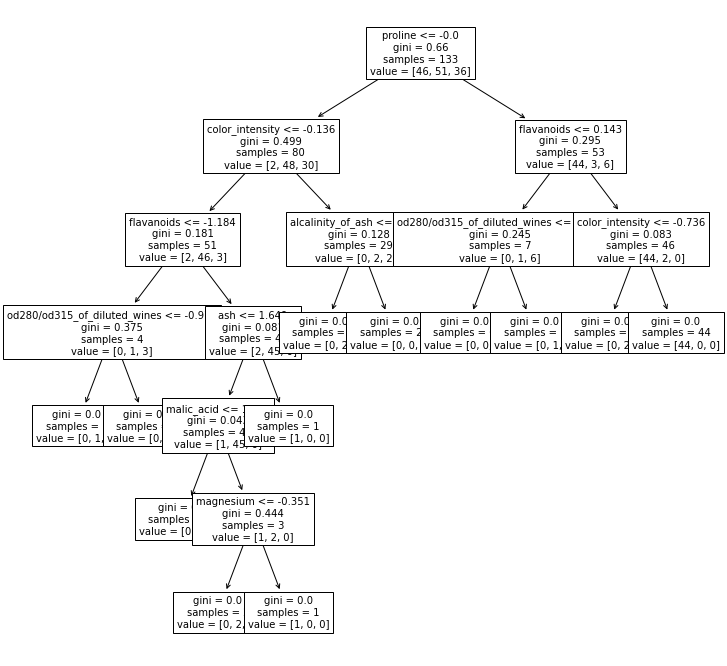

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf_tree, fontsize=10, feature_names=raw_wine['feature_names'])
plt.show()

In [7]:
from sklearn.tree import export_text
r = export_text(clf_tree, feature_names=raw_wine['feature_names'])
print(r)

|--- proline <= -0.00
|   |--- color_intensity <= -0.14
|   |   |--- flavanoids <= -1.18
|   |   |   |--- od280/od315_of_diluted_wines <= -0.97
|   |   |   |   |--- class: 1
|   |   |   |--- od280/od315_of_diluted_wines >  -0.97
|   |   |   |   |--- class: 2
|   |   |--- flavanoids >  -1.18
|   |   |   |--- ash <= 1.65
|   |   |   |   |--- malic_acid <= 1.57
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- malic_acid >  1.57
|   |   |   |   |   |--- magnesium <= -0.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- magnesium >  -0.35
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- ash >  1.65
|   |   |   |   |--- class: 0
|   |--- color_intensity >  -0.14
|   |   |--- alcalinity_of_ash <= -0.68
|   |   |   |--- class: 1
|   |   |--- alcalinity_of_ash >  -0.68
|   |   |   |--- class: 2
|--- proline >  -0.00
|   |--- flavanoids <= 0.14
|   |   |--- od280/od315_of_diluted_wines <= 0.27
|   |   |   |--- class: 2
|   |   |--- od280/od315_of_diluted_wines >  0.27


In [8]:
pred = clf_tree.predict(X_te_std)
print(pred)
print(y_te)

[1 1 1 0 0 2 2 1 2 1 0 1 0 1 1 1 1 2 0 2 0 2 2 0 0 1 2 2 1 0 0 1 2 1 1 1 0
 1 0 2 0 0 1 0 2]
[1 1 1 0 0 2 1 1 2 2 0 2 0 1 1 1 1 2 0 2 0 2 2 0 0 1 2 1 1 0 1 1 2 1 1 1 0
 1 0 2 0 1 1 0 2]


In [9]:
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.89      0.80      0.84        20
           2       0.83      0.83      0.83        12

    accuracy                           0.87        45
   macro avg       0.86      0.88      0.87        45
weighted avg       0.87      0.87      0.86        45



In [10]:
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)

In [11]:
y = 4 * (X - 0.5) ** 2

In [12]:
y = y + np.random.randn(m, 1) / 10

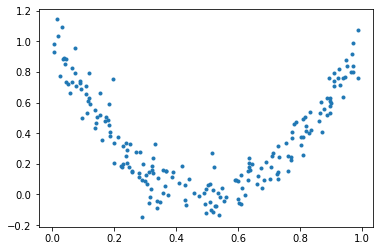

In [13]:
plt.plot(X, y, '.')

In [14]:
np.mean(y)

0.35386923462660264

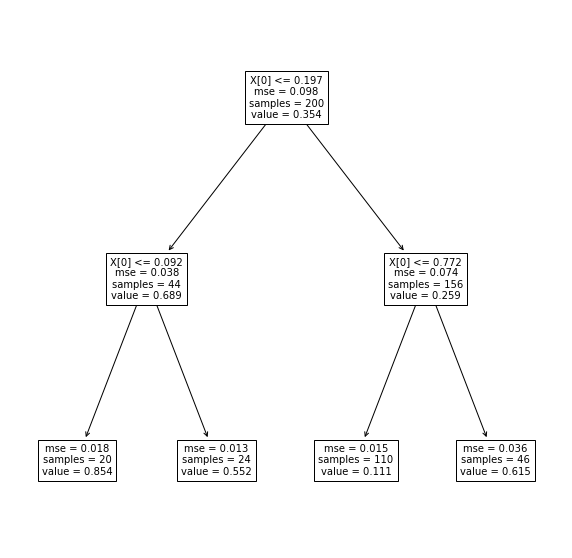

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree.plot_tree(tree_reg, fontsize=10)
plt.show()

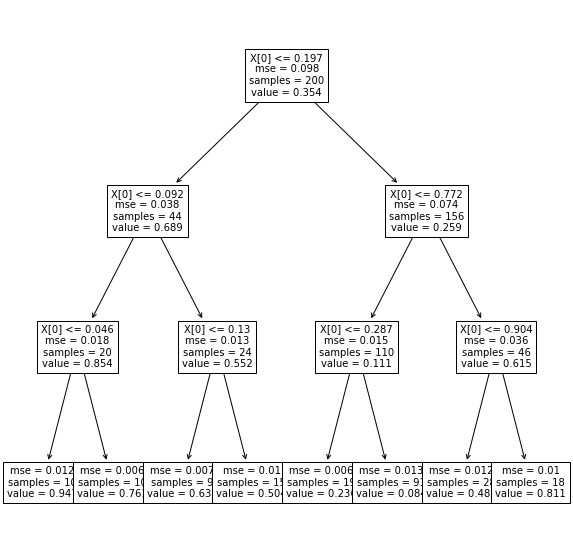

In [16]:
tree_reg3 = DecisionTreeRegressor(max_depth=3)
tree_reg3.fit(X, y)
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree.plot_tree(tree_reg3, fontsize=10)
plt.show()

In [17]:
from sklearn.datasets import load_breast_cancer

In [18]:
X, y = load_breast_cancer(return_X_y=True)

In [19]:
X[1]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = tree.DecisionTreeClassifier(random_state=0)

In [21]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

In [22]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [23]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [24]:
impurities

array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
       0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
       0.10634033, 0.14056508, 0.46786352])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

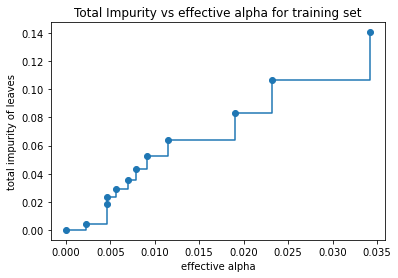

In [25]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [26]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


In [27]:
clfs

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, class_weight=None,
                        criterion='gini', max

In [28]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [29]:
clfs[10].tree_.node_count

5

[Text(167.4, 190.26, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(83.7, 135.9, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(41.85, 81.53999999999999, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(125.55000000000001, 81.53999999999999, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(251.10000000000002, 135.9, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(209.25, 81.53999999999999, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(251.10000000000002, 27.180000000000007, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(292.95, 81.53999999999999, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

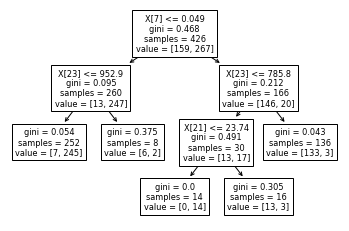

In [30]:
tree.plot_tree(clfs[8])

In [31]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

In [32]:
node_counts

[31, 27, 21, 19, 17, 15, 13, 11, 9, 7, 5, 3]

In [33]:
depth

[8, 6, 4, 4, 4, 4, 4, 4, 3, 3, 2, 1]

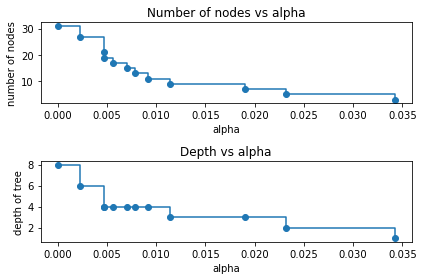

In [34]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [35]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

In [36]:
test_scores

[0.8811188811188811,
 0.8881118881118881,
 0.916083916083916,
 0.916083916083916,
 0.916083916083916,
 0.9230769230769231,
 0.9300699300699301,
 0.9300699300699301,
 0.9370629370629371,
 0.916083916083916,
 0.916083916083916,
 0.8811188811188811]

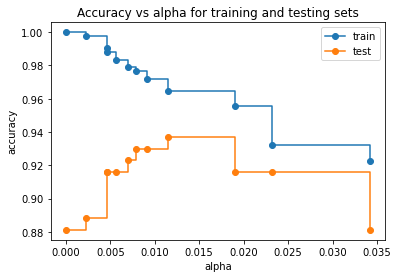

In [37]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

[Text(167.4, 190.26, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(83.7, 135.9, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(41.85, 81.53999999999999, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(125.55000000000001, 81.53999999999999, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(251.10000000000002, 135.9, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(209.25, 81.53999999999999, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(251.10000000000002, 27.180000000000007, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(292.95, 81.53999999999999, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

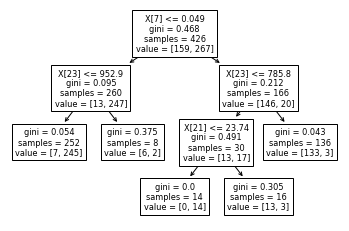

In [38]:
tree.plot_tree(clfs[8])

[Text(468.32142857142856, 770.1, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(298.9285714285714, 679.5, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(199.28571428571428, 588.9, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(119.57142857142856, 498.3, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(79.71428571428571, 407.7, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(39.857142857142854, 317.1, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(119.57142857142856, 317.1, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(79.71428571428571, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(159.42857142857142, 226.5, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(119.57142857142856, 135.89999999999998, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(79.71428571428571, 45.30000000000007, 'gin

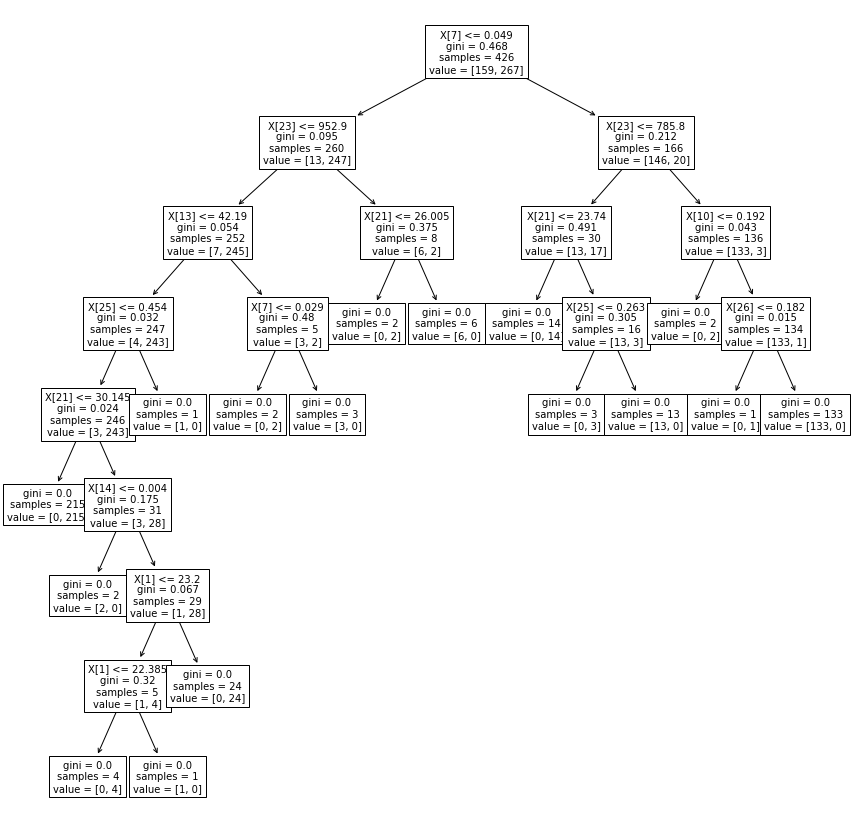

In [39]:
plt.figure(figsize=(15,15))  # set plot size (denoted in inches)

tree.plot_tree(clfs[0] , fontsize=10)